In [1]:
import numpy as np
import pandas as pd
import os
import re
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from math import log
import matplotlib.pyplot as plt


# Dataset:

Netflix Price Dataset: https://files.grouplens.org/datasets/ml-25m.zip

# Load Dataset
1. Load the movies.csv data
2. Clean the titles - there are parenthesis/ special characters in the movie name

In [2]:
movies_df = pd.read_csv("ml-10M100K/movies.dat",delimiter='::',names=['MovieID','title','genres'])

/var/folders/1h/8zf2rcls4h37bpx4_bc7brjc0000gn/T/ipykernel_52356/1448126342.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies_df = pd.read_csv("ml-10M100K/movies.dat",delimiter='::',names=['MovieID','title','genres'])


In [3]:
def clean(title):
    return re.sub("[^a-zA-Z0-9 ]","", title) 


movies_df["clean_title"] = movies_df["title"].apply(clean)
movies_df.head(3)


,MovieID,title,genres,clean_title
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story 1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji 1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men 1995


## Split year and movie names

In [4]:
movies_df["clean_title"],movies_df["year_released"] = movies_df["clean_title"].str[:-5], movies_df["clean_title"].str[-4:]

In [5]:
movies_df

,MovieID,title,genres,clean_title,year_released
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,Toy Story,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,Jumanji,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,Grumpier Old Men,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,Waiting to Exhale,1995
4,5,Father of the Bride Part II (1995),Comedy,Father of the Bride Part II,1995
...,...,...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy,Bedtime Stories,2008
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance,Manhattan Melodrama,1934
10678,65126,Choke (2008),Comedy|Drama,Choke,2008
10679,65130,Revolutionary Road (2008),Drama|Romance,Revolutionary Road,2008


## Clean the Genres column

In [6]:
movies_df['genres'] = movies_df['genres'].str.replace('(no genres listed)', '')

## Vizualization

#### Viz of Number of movies by Genre

In [7]:
genres =  movies_df['genres'].str.replace('|'," ")

In [8]:
genres_lst = dict()
for g in genres:
   for sg in g.split(" "):
       if sg != "":
        genres_lst[sg] = genres_lst.get(sg,0)+1

<BarContainer object of 19 artists>

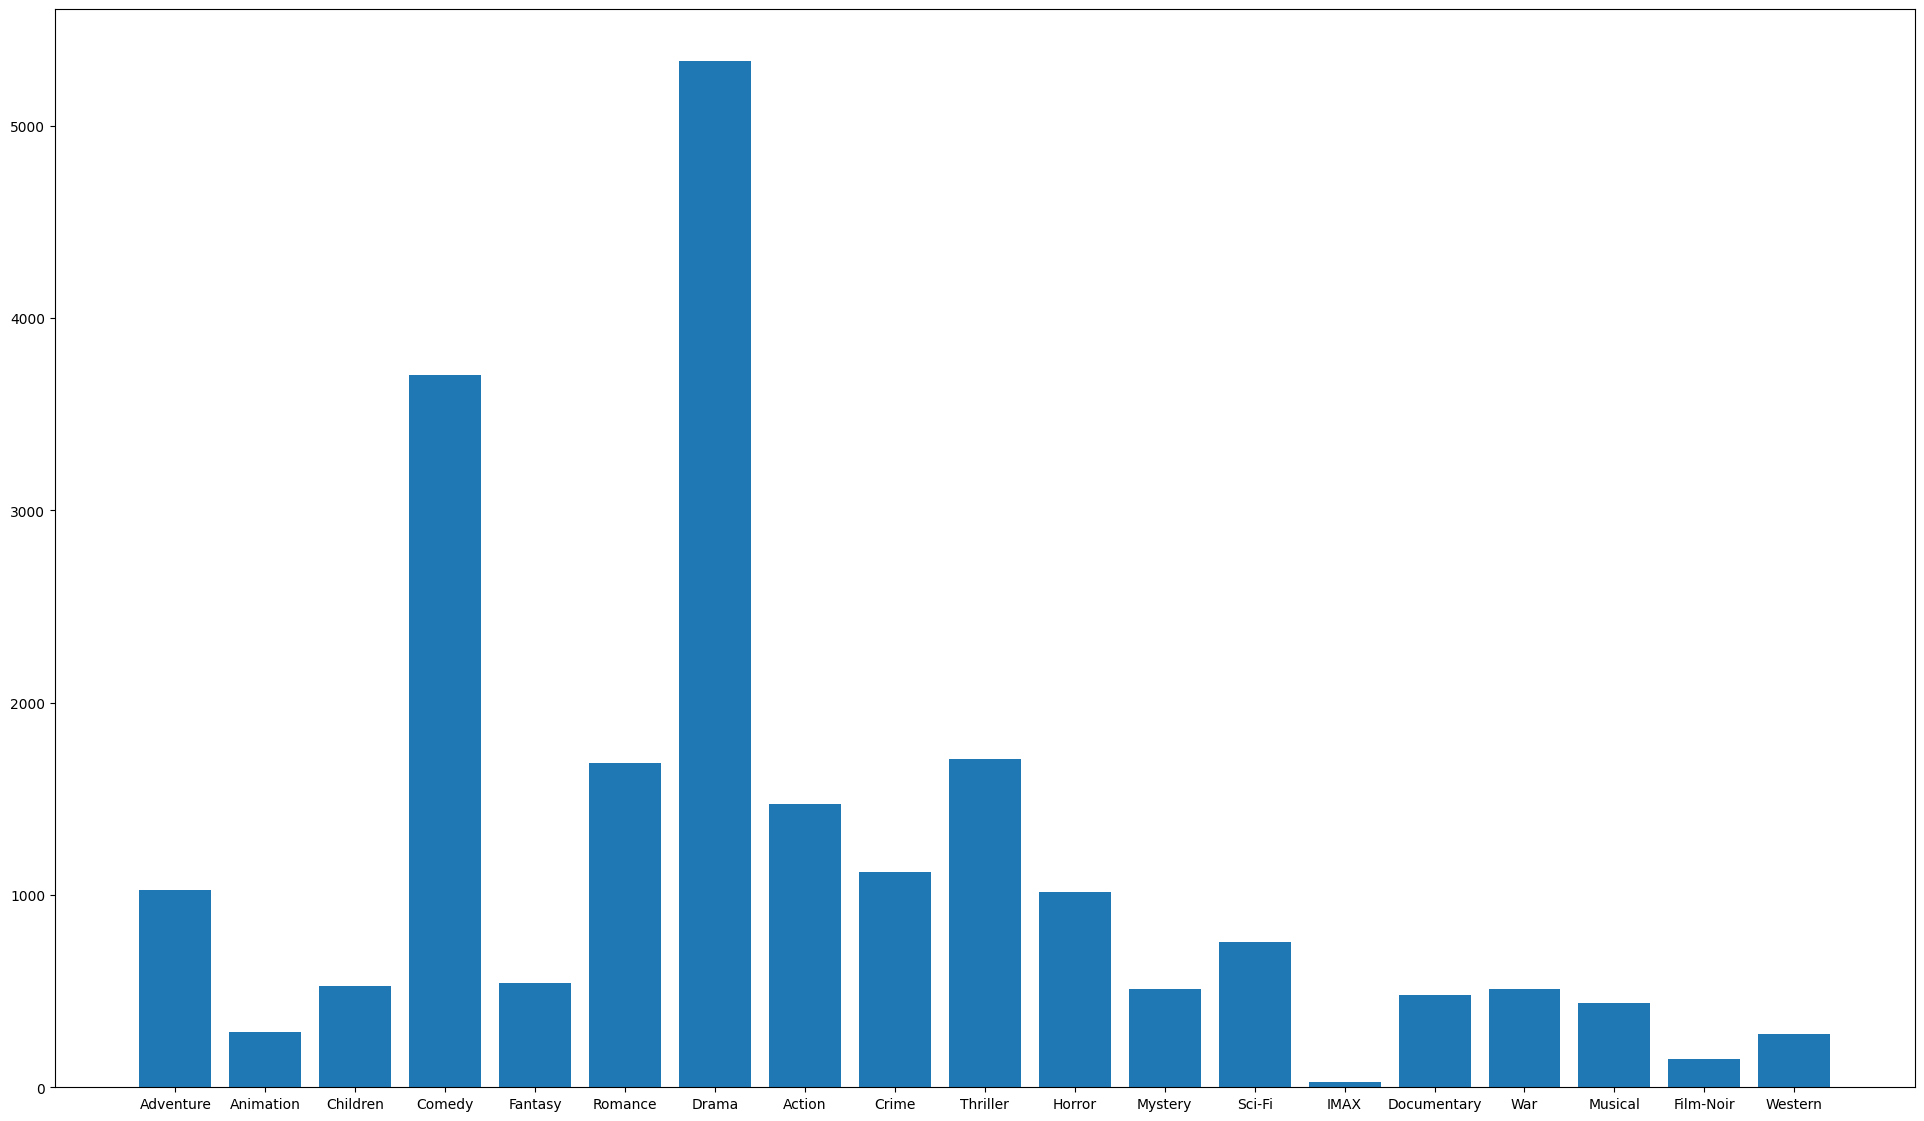

In [9]:
fig1 = plt.figure(figsize=(24,14))
plt.bar(height = genres_lst.values(),x = genres_lst.keys())


#### Visualization of movies released in a year

In [10]:
year_dict ={}
for y in movies_df["year_released"]:
    year_dict[y] = year_dict.get(y,0)+1

<BarContainer object of 94 artists>

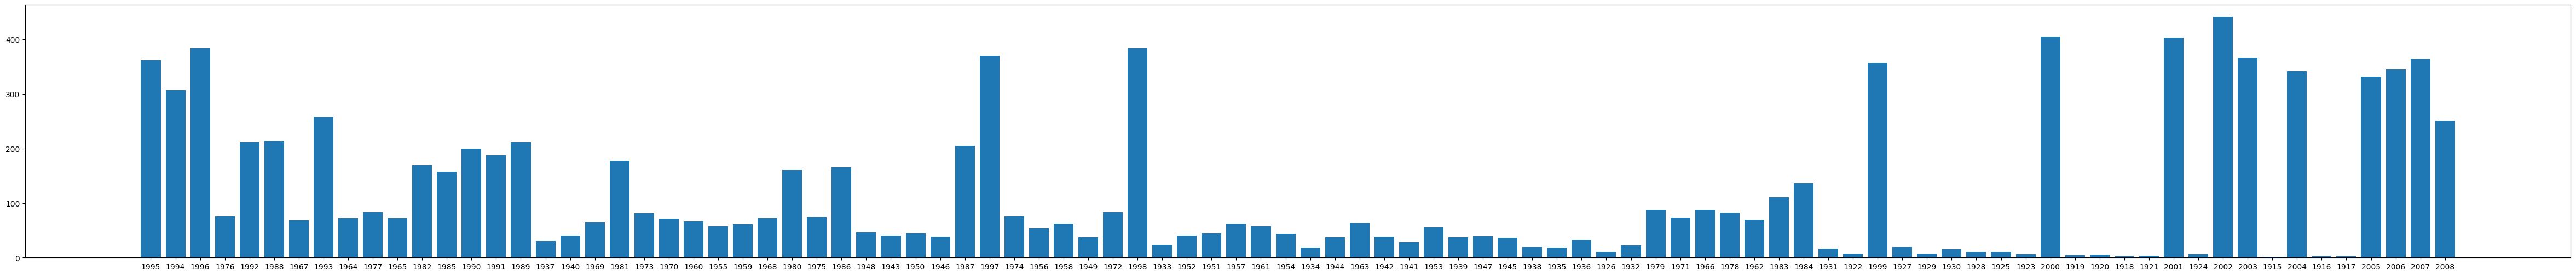

In [11]:
fig2 = plt.figure(figsize=(60,6))
plt.bar(height=year_dict.values(),x = year_dict.keys())

## Build the search engine - Content Based

In [12]:
tfidf = TfidfVectorizer(token_pattern='\w+', lowercase=True)
tfidf_matrix = tfidf.fit_transform(genres)

In [13]:
tfidf_matrix.toarray()

array([[0.        , 0.40363133, 0.55745095, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.50956703, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
tfidf_matrix.shape

(10681, 21)

In [15]:
similarity = cosine_similarity(tfidf_matrix)


In [16]:
similarity_df = pd.DataFrame(similarity, columns=movies_df['clean_title'], index=movies_df['clean_title'])

In [17]:
movie = input('Enter a movie you like: ')

# Find the index of the movie in the similarity dataframe
movie_index = similarity_df.index.get_loc(movie)

# Get the top 10 most similar movies to the movie
top_10 = similarity_df.iloc[movie_index].sort_values(ascending=False)[1:11]

# Print the top 10 most similar movies to the movie
print(f'Top 10 similar movies to {movie}:')
print(top_10)

Top 10 similar movies to Jumanji:
clean_title
Labyrinth                                   1.0
Escape to Witch Mountain                    1.0
Santa Claus The Movie                       1.0
Indian in the Cupboard The                  1.0
Magic in the Water                          1.0
Harry Potter and the Chamber of Secrets     1.0
NeverEnding Story III The                   1.0
Return to Oz                                1.0
Harry Potter and the Prisoner of Azkaban    1.0
Bridge to Terabithia                        1.0
Name: Jumanji, dtype: float64


### User based recomendation system

In [18]:
ratinngs_df = pd.read_csv("ml-10M100K/ratings.dat",delimiter='::',names = ['UserID','MovieID','Rating','Timestamp'])

/var/folders/1h/8zf2rcls4h37bpx4_bc7brjc0000gn/T/ipykernel_52356/2130994795.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratinngs_df = pd.read_csv("ml-10M100K/ratings.dat",delimiter='::',names = ['UserID','MovieID','Rating','Timestamp'])


Merge tables

In [19]:
df = pd.merge(ratinngs_df, movies_df, on='MovieID', how='inner')

Pivot table

In [20]:
ratinngs_df_to_pivot = df[['UserID','clean_title','Rating']]

In [21]:
pivot_df = ratinngs_df_to_pivot.pivot_table(index="UserID",columns="clean_title",values="Rating",aggfunc='first')

In [22]:
pivot_df

clean_title,1 2 3 Sun Un deuz trois soleil,10,10 Items or Less,10 Rillington Place,10 Things I Hate About You,10 to Midnight,100 Feet,100 Girls,100 Rifles,1000 Eyes of Dr Mabuse The Tausend Augen des Dr Mabuse Die,...,Zulu,Zus Zo,batteries not included,burbs The,eXistenZ,ffolks aka North Sea Hijack,ge dor L,loudQUIETloud A Film About the Pixies,night Mother,xXx State of the Union
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71563,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71565,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
def standardzation(row):
    n_row = (row-row.mean())/((row.notnull()).count())
    return n_row

ratings_std_df = pivot_df.apply(standardzation)
#pivot_df.apply(standardzation)
ratings_std_df = ratings_std_df.fillna(0)

In [24]:
ratings_std_df.head()

clean_title,1 2 3 Sun Un deuz trois soleil,10,10 Items or Less,10 Rillington Place,10 Things I Hate About You,10 to Midnight,100 Feet,100 Girls,100 Rifles,1000 Eyes of Dr Mabuse The Tausend Augen des Dr Mabuse Die,...,Zulu,Zus Zo,batteries not included,burbs The,eXistenZ,ffolks aka North Sea Hijack,ge dor L,loudQUIETloud A Film About the Pixies,night Mother,xXx State of the Union
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#do same as above for all users and finf the top 5-10 similar users ane look what theve likes and dislikes.

In [27]:
ratings_std_df,me=pd.DataFrame(np.delete(ratings_std_df.values,(-1),axis=0)),ratings_std_df.tail(1)


In [29]:
ratings_std_df

,0,1,2,3,4,5,6,7,8,9,...,10392,10393,10394,10395,10396,10397,10398,10399,10400,10401
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69872,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69873,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69874,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69875,0.0,0.0,0.0,0.0,0.000023,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
user_sim = (cosine_similarity(ratings_std_df,me))

In [33]:
user_sim.sort()

In [47]:
user_similarity_df = pd.DataFrame(user_sim, columns=['Similarity'], index=pivot_df.index[:-1]).sort_values(by='Similarity', key=lambda x: -x)